In [2]:
import cptac
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sodapy import Socrata

In [3]:
cptac.download(dataset="Endometrial")

True

In [4]:
endo = cptac.Endometrial()

In [5]:
# Load the proteomics dataframe
df_prot = endo.get_proteomics()
#df_prot.head()

#Groups in data, multiple index (i.e. male female, actual measurements

In [6]:
# # Count the number of columns for each gene
# #    This is a byproduct of having multi-level indexing (Name, Database_ID)
# from collections import Counter
# c = Counter(
#     df_prot.columns.get_level_values('Name')
# )
# c.most_common()

In [7]:
# Generate list of lists from the read lines of the filtered_genes_list
fgl = [word.strip('\n').split(',') for word in open("filtered_genes_list.txt", 'r').readlines()]

In [8]:
# Create just a single list from the lines in the read list.
fgl2 = []
for sublist in fgl:
    for item in sublist:
        fgl2.append(item)

In [9]:
# Subset the proteomics dataset to only include the genes in the filtered list.
df2 = df_prot[fgl2]

In [10]:
#Creating the dimensions of cmap
cmap = sns.diverging_palette(10, 220, sep=80, as_cmap=True)

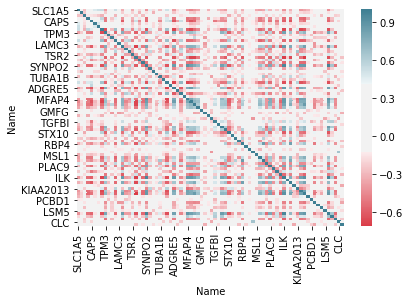

In [23]:
#Generating a dataframe based on the correlations
df2corr = df2.corr()
# Genrate a heatmap based on the correlation
sns.heatmap(df2corr, cmap = cmap)

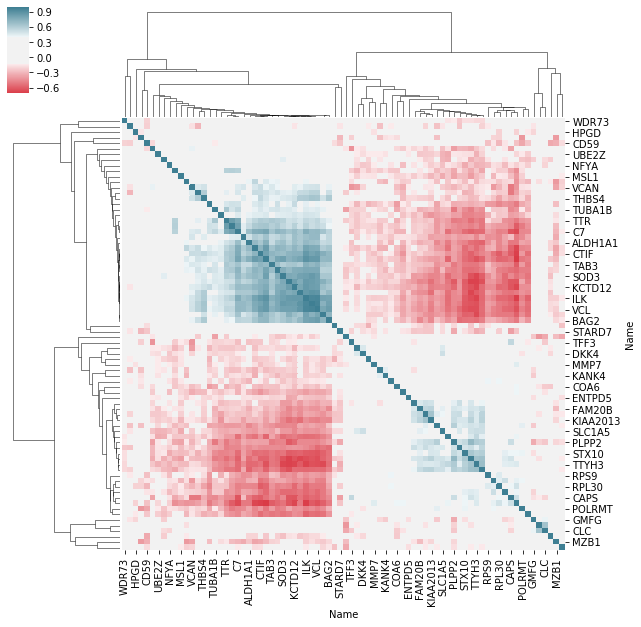

In [12]:
# Generates a clustermap based on the correlation metrid
sns.clustermap(df2corr, cmap=cmap, metric = 'correlation')

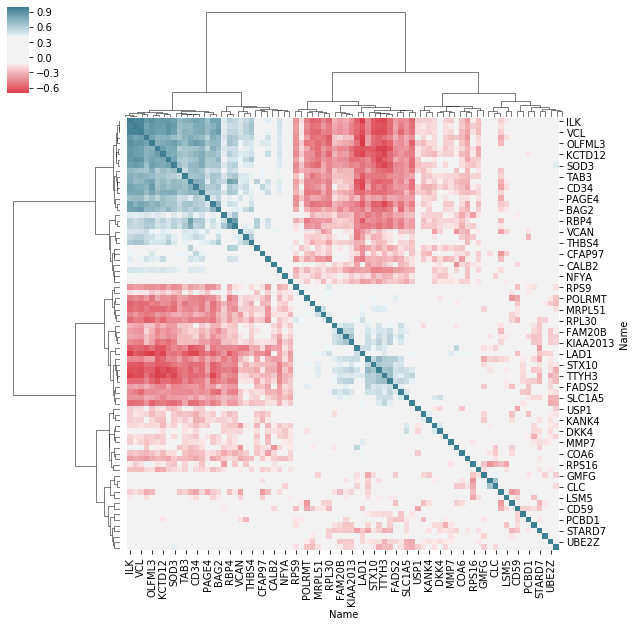

In [13]:
# Generated a clustermap based on the examples in the slides.
sns.clustermap(df2.corr(), cmap=cmap, square=True, method='ward', metric='euclidean')

What is the significance of the resulting clustermap?
The first cluster map the genes based on similarity between two genes, and clustered as such. The second clustermap is based on the euclidean distance between points. Points that are close to each other are grouped together. Both of these are more informative than the heatmap, which shows correlation without actually organizing the genes into clusters.

Text(0.5, 1.0, 'Most Up/Down Regulated Pathways')

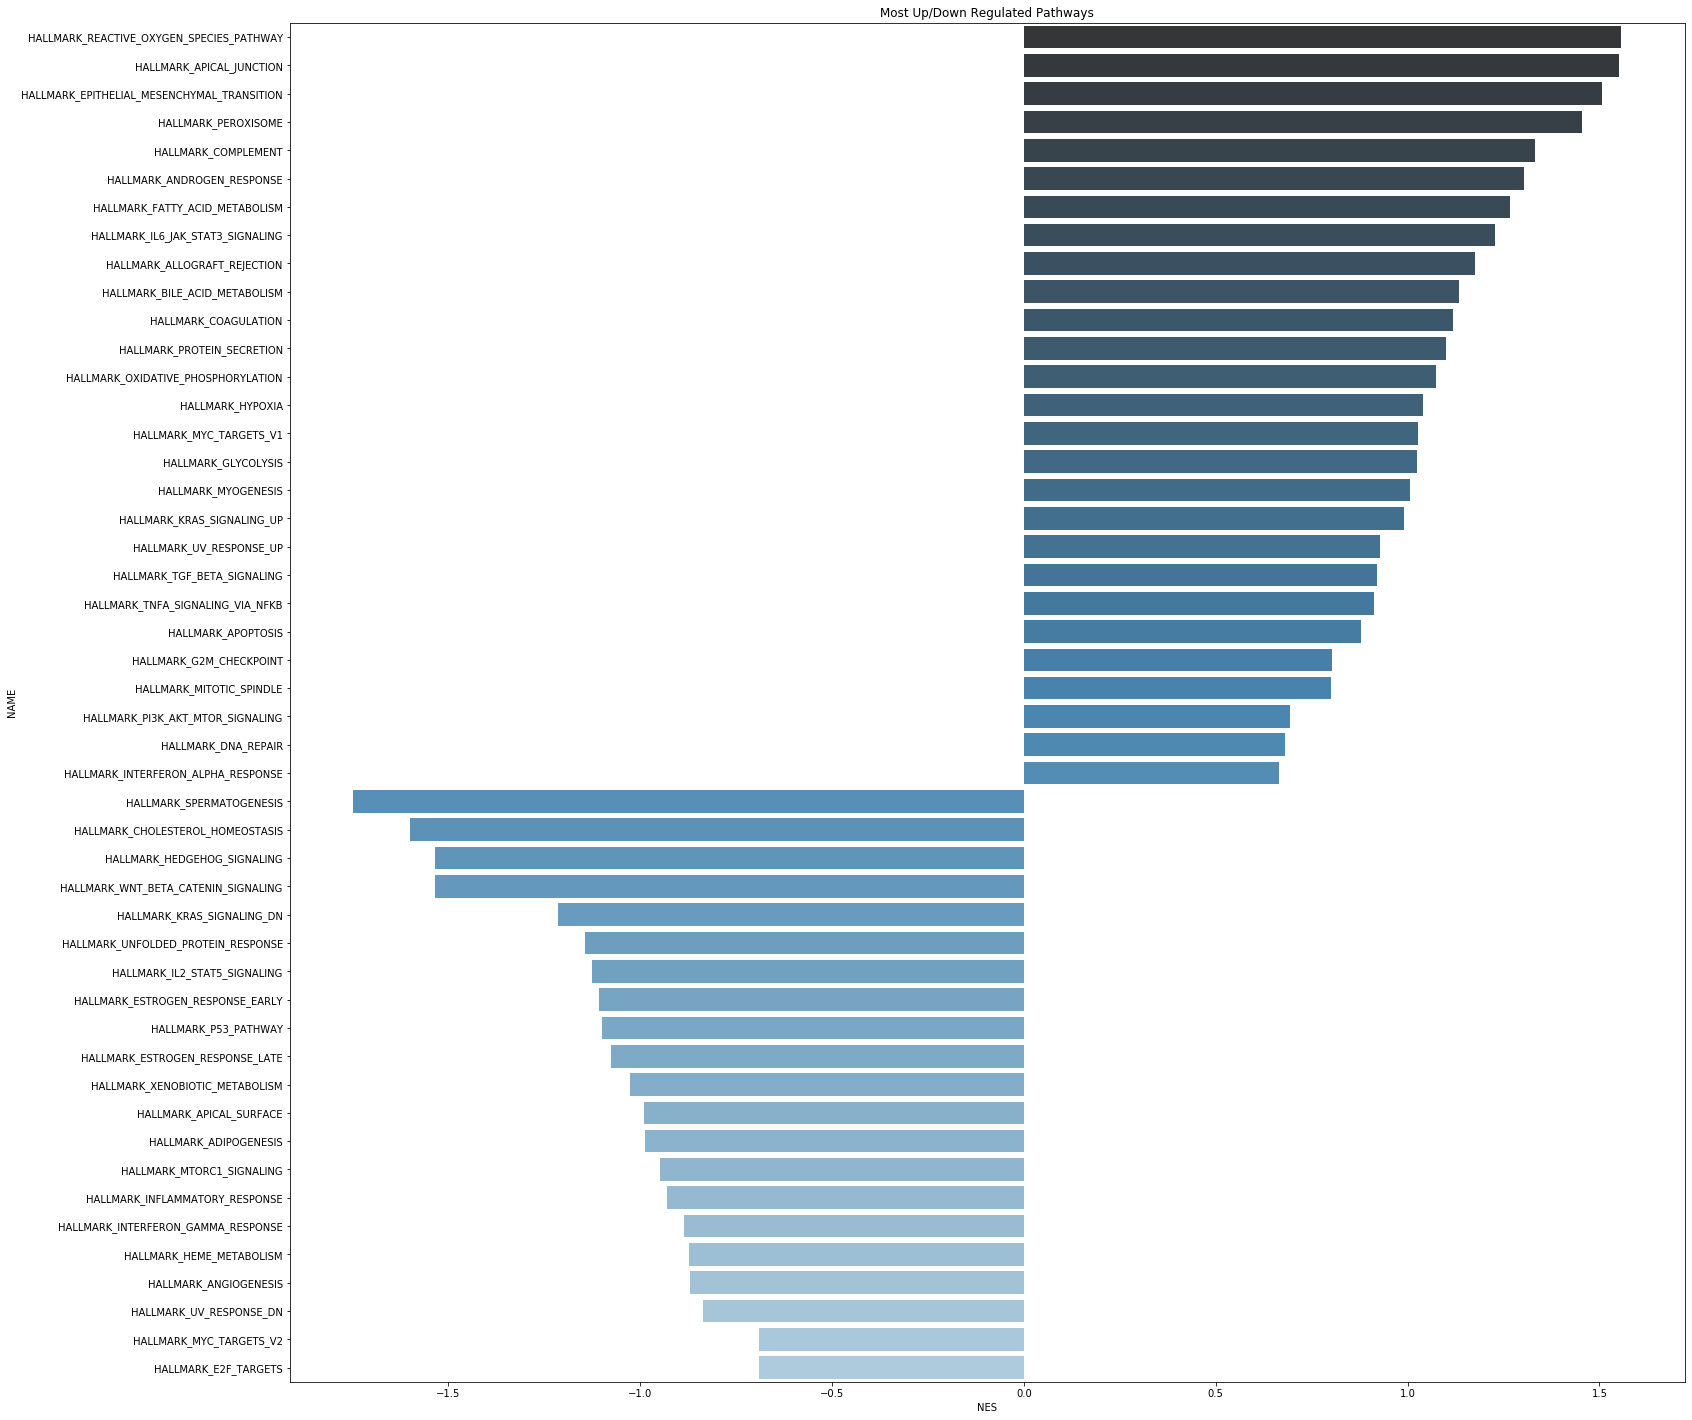

In [15]:
# Plot all of the pathways based on their NES level
plt.figure(figsize=(25, 25))
sns.barplot(df['NES'], df['NAME'], palette="Blues_d").set_title('Most Up/Down Regulated Pathways')


Text(0.5, 1.0, 'FDR Q-Vals')

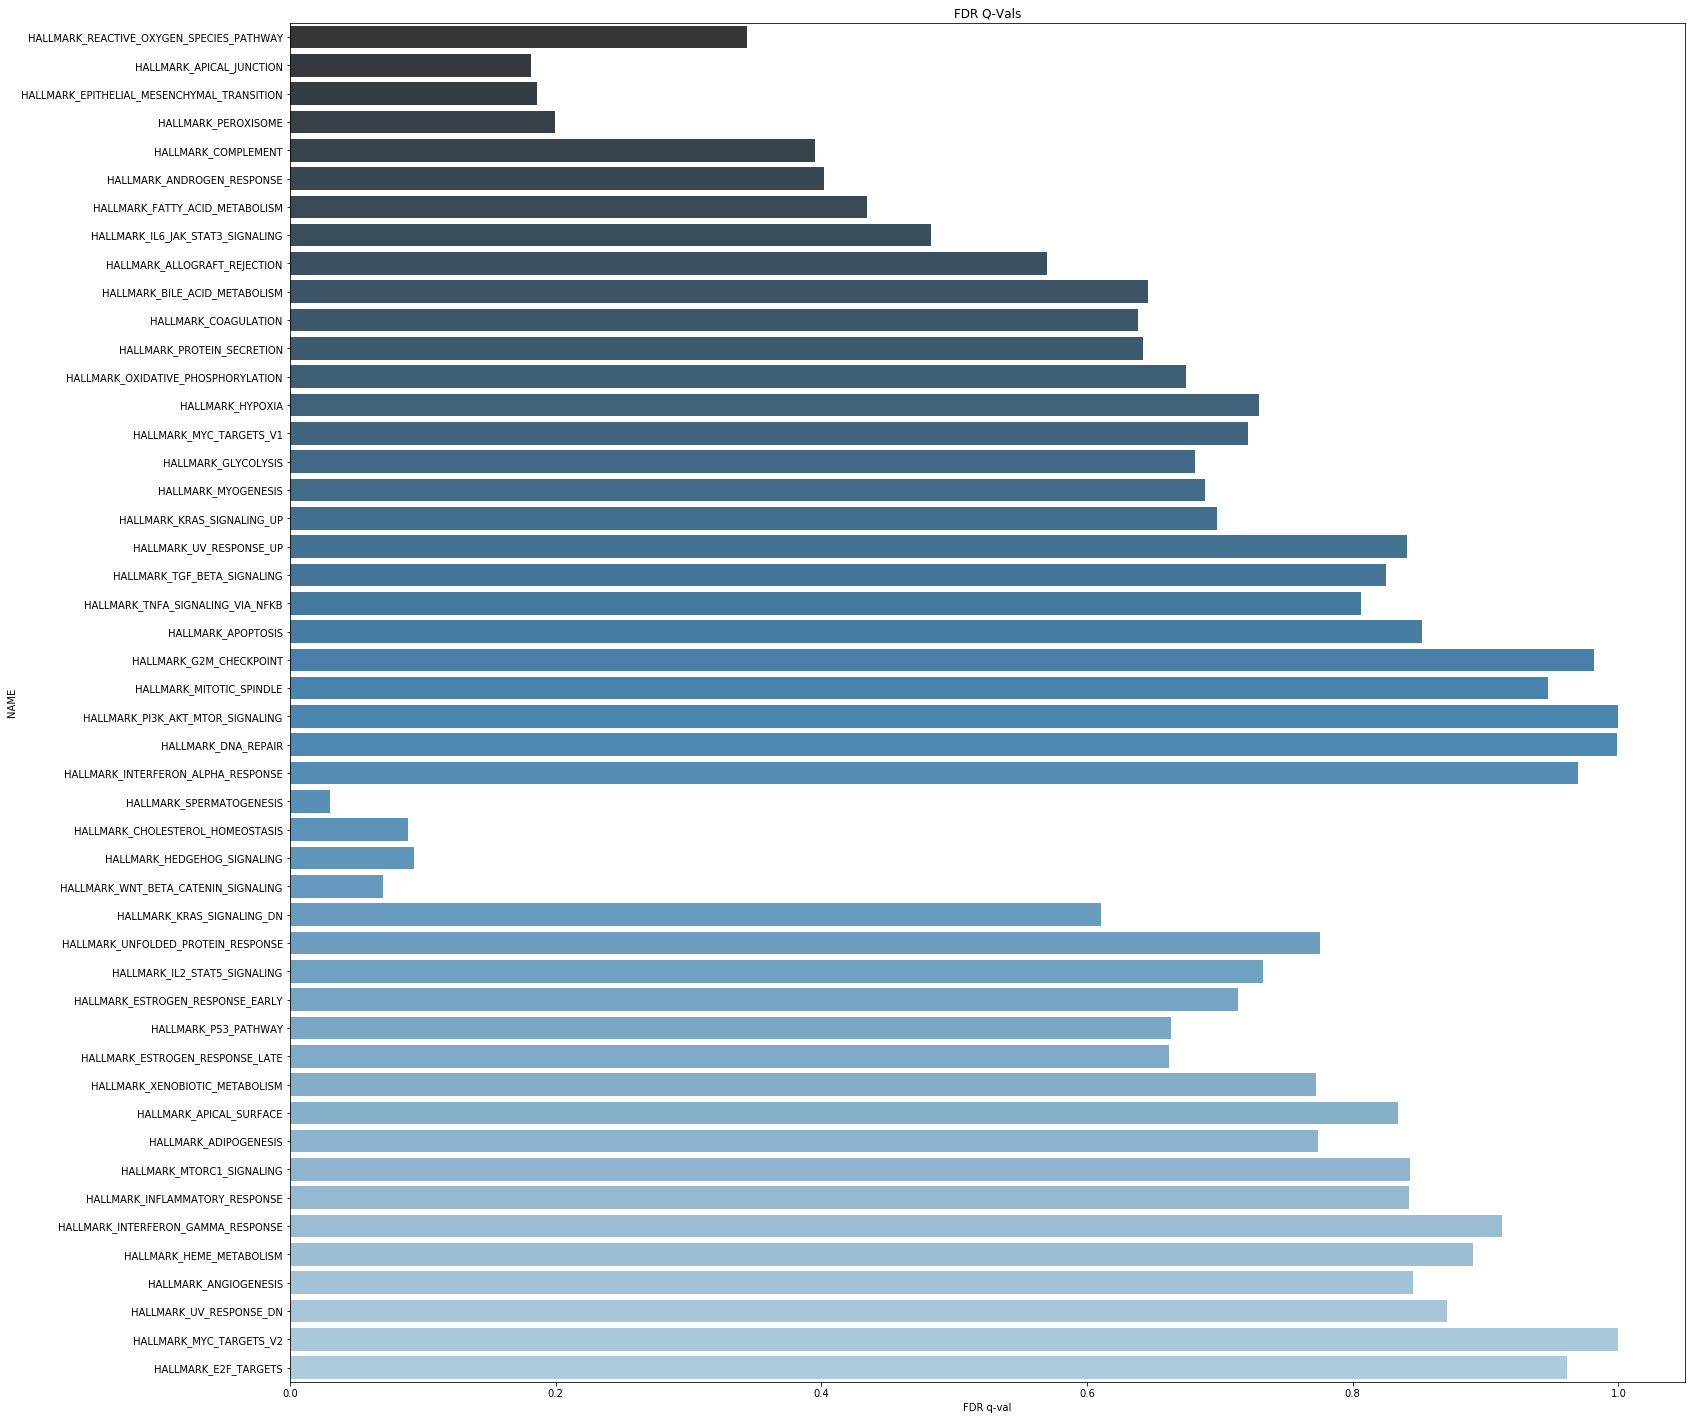

In [16]:
# Plot all of the FDR q-values for all the pathways.
plt.figure(figsize=(25, 25))
sns.barplot(df['FDR q-val'], df['NAME'], palette="Blues_d").set_title('FDR Q-Vals')


In [17]:
# Subset the top 5 pathways (based on NES) that are most highly enriched
dfp = df[0:5]

In [19]:
# Subset the top 5 pathways (based on NES) that are least enriched
dfn = df[27:32]

In [21]:
# Create a new dataframe that only contains the top 5 enriched and top 5 least enriched pathways.
dfc = dfp.append(dfn)

Text(0.5, 1.0, 'Pathways with Highest and Lowest NES scores')

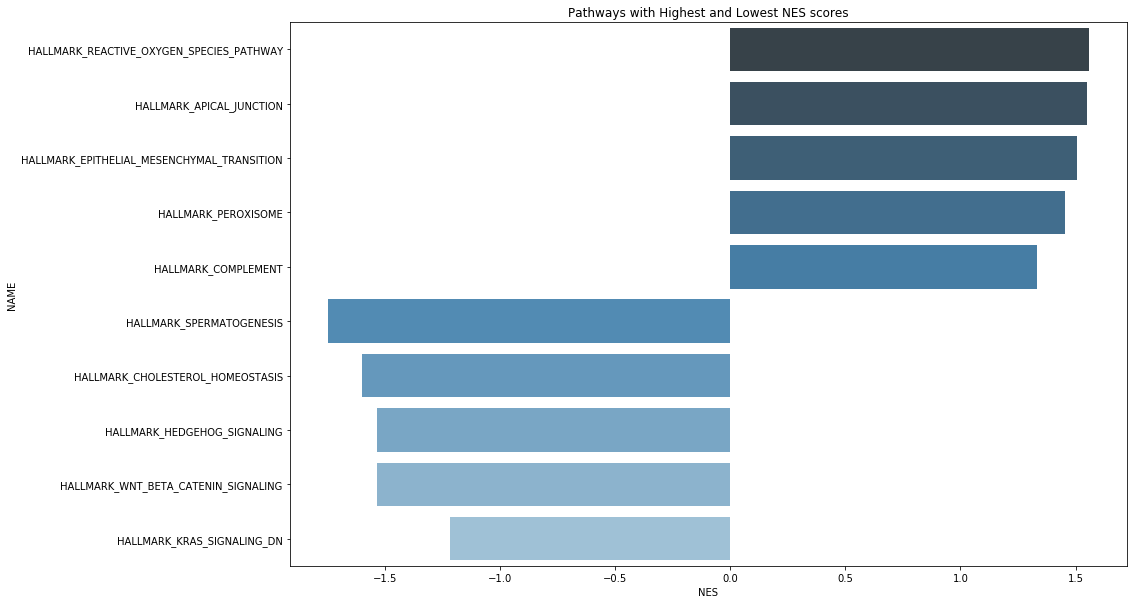

In [22]:
# Plot the dataframes with only the most impacted pathways. 
plt.figure(figsize=(15, 10))

sns.barplot(dfc['NES'], dfc['NAME'], palette="Blues_d").set_title('Pathways with Highest and Lowest NES scores')